# IA Xente Fraud Detection MODEL

Introduction:

Being a part of the Machine Learning Course, the Artificial Intelligence Laboratory allows us to create and train a model using python. The assesment is based on the Xente Fraud Detection Challenge from Zindi website (https://zindi.africa/competitions/xente-fraud-detection-challenge).

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import numpy as np

In [3]:
Xente_Variable_Definitions_path = 'Xente_Variable_Definitions.csv'

Xente_Variable_Definitions_data = pd.read_csv(Xente_Variable_Definitions_path) 

Xente_Variable_Definitions_data

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [4]:
training_path = 'training.csv'

training_data = pd.read_csv(training_path) 

training_data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
y = training_data.FraudResult

In [6]:
features = [ f for f in Xente_Variable_Definitions_data['Column Name']]
features = features[0:14] #otherwise we take the target feature
features

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime']

In [7]:
X = training_data[features]
X

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z


In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

 # Data preprocessing

## dealing with categorical data

In [9]:
s = (train_X.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime']

In [10]:
# transform ID columns from TransactionId_76871 to 76871

#train_X.TransactionId.str.split('_')

id_Transaction = train_X.TransactionId.map(lambda col : int(col.split('_')[1]))
train_X.TransactionId = id_Transaction

id_Batch = train_X.BatchId.map(lambda col : int(col.split('_')[1]))
train_X.BatchId = id_Batch

id_Account = train_X.AccountId.map(lambda col : int(col.split('_')[1]))
train_X.AccountId = id_Account

id_Subscription = train_X.SubscriptionId.map(lambda col : int(col.split('_')[1]))
train_X.SubscriptionId = id_Subscription

id_Customer = train_X.CustomerId.map(lambda col : int(col.split('_')[1]))
train_X.CustomerId = id_Customer


id_Provider = train_X.ProviderId.map(lambda col : int(col.split('_')[1]))
train_X.ProviderId = id_Provider

id_Product = train_X.ProductId.map(lambda col : int(col.split('_')[1]))
train_X.ProductId = id_Product

id_Channel = train_X.ChannelId.map(lambda col : int(col.split('_')[1]))
train_X.ChannelId = id_Channel


In [11]:
id_Transaction = val_X.TransactionId.map(lambda col : int(col.split('_')[1]))
val_X.TransactionId = id_Transaction

id_Batch = val_X.BatchId.map(lambda col : int(col.split('_')[1]))
val_X.BatchId = id_Batch

id_Account = val_X.AccountId.map(lambda col : int(col.split('_')[1]))
val_X.AccountId = id_Account

id_Subscription = val_X.SubscriptionId.map(lambda col : int(col.split('_')[1]))
val_X.SubscriptionId = id_Subscription

id_Customer = val_X.CustomerId.map(lambda col : int(col.split('_')[1]))
val_X.CustomerId = id_Customer


id_Provider = val_X.ProviderId.map(lambda col : int(col.split('_')[1]))
val_X.ProviderId = id_Provider

id_Product = val_X.ProductId.map(lambda col : int(col.split('_')[1]))
val_X.ProductId = id_Product

id_Channel = val_X.ChannelId.map(lambda col : int(col.split('_')[1]))
val_X.ChannelId = id_Channel

In [12]:
#missing values imputation

cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]
cols_with_missing

#THERE is no missing values yeaay


[]

In [13]:
print(train_X.ProductCategory.unique())
print(train_X.CurrencyCode.unique())
print(val_X.ProductCategory.unique())
print(val_X.CurrencyCode.unique())


print(train_X.CountryCode.unique())
print(val_X.CountryCode.unique())

['data_bundles' 'airtime' 'financial_services' 'movies' 'utility_bill'
 'tv' 'transport' 'ticket' 'other']
['UGX']
['airtime' 'financial_services' 'tv' 'data_bundles' 'movies'
 'utility_bill' 'ticket' 'transport' 'other']
['UGX']
[256]
[256]


Since ProductCategory have 8 possible categorical values, I chose to do One hot encoding for this colums and remove the column CurrencyCode since it has only one possible entry and the same for CountryCode

In [14]:

object_cols = ['ProductCategory']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_valid.index = val_X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_X.drop(object_cols, axis=1)
num_X_valid = val_X.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)


OH_X_valid


c:\Users\tardi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,TransactionStartTime,0,1,2,3,4,5,6,7,8
69075,91392,117569,834,3759,1179,UGX,256,1,3,3,...,2019-01-23T11:50:31Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65709,119416,24161,4127,4240,4579,UGX,256,6,10,3,...,2019-01-19T17:11:53Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5430,124012,51521,190,1897,513,UGX,256,6,10,3,...,2018-11-22T06:34:07Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82375,12251,126898,4840,3829,3212,UGX,256,4,6,2,...,2019-02-01T17:45:07Z,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60896,27059,17843,1579,821,1956,UGX,256,6,3,3,...,2019-01-15T12:21:53Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91264,33401,50130,1011,928,1362,UGX,256,5,10,3,...,2019-02-08T20:37:34Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4936,127307,119994,3567,3669,4005,UGX,256,5,15,3,...,2018-11-21T09:40:08Z,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
82534,17013,35797,192,433,515,UGX,256,6,10,3,...,2019-02-01T18:44:14Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15412,106649,137004,4249,4429,7343,UGX,256,4,3,2,...,2018-12-04T15:53:32Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_train_reduced = OH_X_train.drop(['CurrencyCode','CountryCode'], axis=1)
X_val_reduced = OH_X_valid.drop(['CurrencyCode','CountryCode'], axis=1)
X_train_reduced 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,0,1,2,3,4,5,6,7,8
43878,82059,48408,2946,3991,3371,6,2,3,2500.0,2500,2018-12-28T10:38:00Z,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55031,115282,5122,4468,3787,4928,6,3,3,1000.0,1000,2019-01-09T07:45:47Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28483,36103,117608,3750,3024,4193,6,3,3,2000.0,2000,2018-12-15T15:15:15Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7328,5655,75137,4841,3829,4371,4,6,2,-1000.0,1000,2018-11-24T08:54:26Z,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18860,87110,84248,4841,3829,2710,4,6,2,-5000.0,5000,2018-12-07T06:39:17Z,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,1505,124507,575,4369,912,1,1,3,2000.0,2000,2018-12-08T20:41:20Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45891,68325,94167,4841,3829,2416,4,6,2,-50.0,50,2018-12-29T08:29:15Z,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,62369,85767,571,873,908,6,3,3,1500.0,1500,2018-12-27T17:03:47Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43567,1639,36597,2123,1456,2528,6,1,3,2000.0,2000,2018-12-28T08:06:55Z,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#deal with the transaction time 

X_train_reduced['TransactionStartTime'] = X_train_reduced['TransactionStartTime'].str.replace('T', ' ')
X_train_reduced['TransactionStartTime'] = X_train_reduced['TransactionStartTime'].str.replace('Z', '')

X_train_reduced['TransactionStartTime'] = pd.to_datetime(X_train_reduced['TransactionStartTime'], infer_datetime_format=True) 

X_train_reduced['Year'] = X_train_reduced['TransactionStartTime'].dt.year
X_train_reduced['Month'] = X_train_reduced['TransactionStartTime'].dt.month
X_train_reduced['Day'] = X_train_reduced['TransactionStartTime'].dt.day
X_train_reduced['Hour'] = X_train_reduced['TransactionStartTime'].dt.hour
X_train_reduced['Minute'] = X_train_reduced['TransactionStartTime'].dt.minute
X_train_reduced['Seconds'] = X_train_reduced['TransactionStartTime'].dt.second
X_train_reduced['week'] = X_train_reduced['TransactionStartTime'].dt.week
X_train_reduced['weekday'] = X_train_reduced['TransactionStartTime'].dt.weekday


X_val_reduced['TransactionStartTime'] = X_val_reduced['TransactionStartTime'].str.replace('T', ' ')
X_val_reduced['TransactionStartTime'] = X_val_reduced['TransactionStartTime'].str.replace('Z', '')

X_val_reduced['TransactionStartTime'] = pd.to_datetime(X_val_reduced['TransactionStartTime'], infer_datetime_format=True) 

X_val_reduced['Year'] = X_val_reduced['TransactionStartTime'].dt.year
X_val_reduced['Month'] = X_val_reduced['TransactionStartTime'].dt.month
X_val_reduced['Day'] = X_val_reduced['TransactionStartTime'].dt.day
X_val_reduced['Hour'] = X_val_reduced['TransactionStartTime'].dt.hour
X_val_reduced['Minute'] = X_val_reduced['TransactionStartTime'].dt.minute
X_val_reduced['Seconds'] = X_val_reduced['TransactionStartTime'].dt.second
X_val_reduced['week'] = X_val_reduced['TransactionStartTime'].dt.week
X_val_reduced['weekday'] = X_val_reduced['TransactionStartTime'].dt.weekday




C:\Users\tardi\AppData\Local\Temp\ipykernel_11356\2655448525.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  X_train_reduced['week'] = X_train_reduced['TransactionStartTime'].dt.week
C:\Users\tardi\AppData\Local\Temp\ipykernel_11356\2655448525.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  X_val_reduced['week'] = X_val_reduced['TransactionStartTime'].dt.week


In [17]:
#now that we seperated the colums TransactionStartTime we need to drop it
X_train_reduced = X_train_reduced.drop(['TransactionStartTime'], axis=1)
X_val_reduced = X_val_reduced.drop(['TransactionStartTime'], axis=1)

In [18]:
X_train_reduced.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Seconds', 'week', 'weekday'],
      dtype='object')

In [19]:
print(X_train_reduced.shape)
print(X_val_reduced.shape)

(71746, 27)
(23916, 27)


Finally, we check that the dataset is well balanced; if it is not the case, we will obtain good results with the training data but the model will not be able to work correctly with the test data and with a new, unknown dataset.

In [26]:
print(training_data.FraudResult.value_counts())
print('Ratio of Fraudulent Transaction compared to all transactions :',training_data.FraudResult.value_counts()[1]/(training_data.FraudResult.value_counts()[0] + training_data.FraudResult.value_counts()[1]))

0    95469
1      193
Name: FraudResult, dtype: int64
Ratio of Fraudulent Transaction compared to all transactions : 0.00201752001839811


As you can see, the dataset is not balanced at all: We have 95649 Non-Fraudulent Transactions but only 193 Fraudulent Transactions, which means -+ 0.2% of the dataset.

In order to balance the dataset, severall methods exists (...). We will use the Oversampling technique, and more specifically the Synthetic minority oversampling technique.

In [30]:
#Oversample the dataset with SMOTE(synthetic minority oversampling technique)
smote_algo = SMOTE(random_state=0)
smote_data_x, smote_data_y = smote_algo.fit_resample(X_train_reduced, train_y)
smote_data_x = pd.DataFrame(data=smote_data_x,columns=X_train_reduced.columns)
smote_data_y = pd.DataFrame(data=smote_data_y,columns=["Class"])

smote_data = smote_data_x
smote_data["Class"] = smote_data_y["Class"]

        TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0               82059    48408       2946            3991        3371   
1              115282     5122       4468            3787        4928   
2               36103   117608       3750            3024        4193   
3                5655    75137       4841            3829        4371   
4               87110    84248       4841            3829        2710   
...               ...      ...        ...             ...         ...   
143181          82674    29046       2864            4063        3281   
143182         110147    11726       1307             381        1669   
143183          86971    50093        388            1710         719   
143184         102523    11033        673            2921        1014   
143185          29970     9356       1609            2872        1988   

        ProviderId  ProductId  ChannelId        Amount    Value  ...    8  \
0                6          2          3  2.50

## Models

### Random Forest Regressor

In [ ]:
def forest_model(train_X,train_y,val_X,val_y):
    model = RandomForestRegressor(random_state=1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return(mean_absolute_error(val_y, preds))

In [ ]:
forest_model(X_train_reduced,train_y,X_val_reduced,val_y)

0.0006476835591235992

In [ ]:
X_train_reduced.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,7,8,Year,Month,Day,Hour,Minute,Seconds,week,weekday
43878,82059,48408,2946,3991,3371,6,2,3,2500.0,2500,...,0.0,0.0,2018,12,28,10,38,0,52,4
55031,115282,5122,4468,3787,4928,6,3,3,1000.0,1000,...,0.0,0.0,2019,1,9,7,45,47,2,2
28483,36103,117608,3750,3024,4193,6,3,3,2000.0,2000,...,0.0,0.0,2018,12,15,15,15,15,50,5
7328,5655,75137,4841,3829,4371,4,6,2,-1000.0,1000,...,0.0,0.0,2018,11,24,8,54,26,47,5
18860,87110,84248,4841,3829,2710,4,6,2,-5000.0,5000,...,0.0,0.0,2018,12,7,6,39,17,49,4


In [ ]:
def XGBOOST(train_X,train_y,val_X,val_y):
    model = XGBRegressor(n_estimators=10000,learning_rate=0.05)
    
    model.fit(train_X, train_y,early_stopping_rounds=5, eval_set=[(val_X, val_y)],verbose=False)

    predictions = model.predict(val_X)
    mae= mean_absolute_error(val_y,predictions)
    return mae


In [ ]:
XGBOOST(X_train_reduced,train_y,X_val_reduced,val_y)

c:\Users\tardi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.002140281732239843

##### Features engineering

In [ ]:
#mutual information

X = X_train_reduced.copy()
y = train_y.copy()



y = y.astype({'FraudResult':'int'})
X = X.astype({'TransactionId':'int','BatchId':'int','AccountId':'int','SubscriptionId':'int','CustomerId':'int','ProviderId':'int','ProductId':'int','ChannelId':'int','Amount':'int','Value':'int','0':'int','1':'int','2':'int','3':'int','4':'int','5':'int','6':'int','7':'int','8':'int','Year':'int','Month':'int','Day':'int','Hour':'int','Minute':'int','Seconds':'int','week':'int','weekday':'int'})


X = pd.concat([X, y], axis=1, join='inner')

y = X.pop('FraudResult')

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

discrete_features

TransactionId     True
BatchId           True
AccountId         True
SubscriptionId    True
CustomerId        True
ProviderId        True
ProductId         True
ChannelId         True
Amount            True
Value             True
0                 True
1                 True
2                 True
3                 True
4                 True
5                 True
6                 True
7                 True
8                 True
Year              True
Month             True
Day               True
Hour              True
Minute            True
Seconds           True
week              True
weekday           True
dtype: bool

In [ ]:
print(y.shape)
X.shape

(71746,)


(71746, 27)

In [ ]:
def make_mi_scores(X, y, discrete_features):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
 
    
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=16, dpi=100)
    return axs

In [ ]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,0.179236,-2.353032,-0.016058,-0.399525,0.010260,-1.924001,-7.205931,-1.020415,0.778920,0.197710,...,-0.325557,1.712252,0.450456,0.821096,-0.585050,0.541106,-0.076307,0.004027,0.076326,2.438491e-15
1,1.669890,1.449342,-1.240755,1.171144,-0.079401,1.113715,-0.427732,-0.303323,0.838886,1.192282,...,-0.493875,0.454829,0.455041,-0.247571,-0.518101,-0.202108,0.030092,-0.018460,-0.059276,-1.312029e-14
2,0.787797,-2.138888,-1.035219,1.177764,-0.537943,-0.871217,0.401835,-0.665697,-0.389891,-0.723871,...,0.383985,0.185276,-0.018109,-0.230544,-0.491744,-0.102351,0.003955,-0.019124,0.017812,1.955020e-14
3,-2.651423,-0.909176,-0.339147,0.154163,0.315153,1.285018,-0.791274,-0.842864,0.132063,-0.427465,...,0.727760,-0.182939,0.353124,0.107543,0.039775,0.450795,0.041578,-0.023519,-0.079006,-3.233876e-14
4,-2.514319,-0.751061,-0.259054,0.146270,0.199930,1.169290,0.025531,-0.487690,0.446305,-0.069155,...,-1.061122,0.366308,-0.669255,0.083396,-0.163750,-0.084647,0.034852,0.043293,-0.003777,1.012850e-13


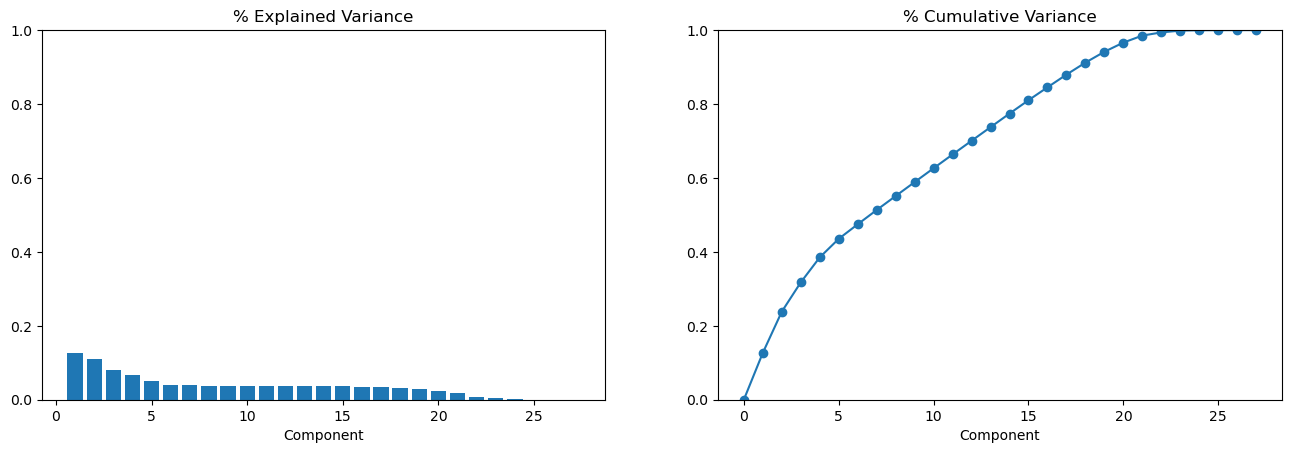

In [ ]:
plot_variance(pca);